<a href="https://colab.research.google.com/github/yiqichenshallwetalk/DigitClassifier/blob/master/Atari_Breakout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install the stable_baselines library

In [0]:
! apt install cmake libopenmpi-dev zlib1g-dev
! pip install stable-baselines
! apt-get install python-opengl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


## Import neccessary packages
- os - an unix like operating system
-  time - will be used to track how much time each computation takes
- numpy - is the main package for scientific computing with Python
- matplotlib - is a plotting library
- random - a random number generator
- stable_baselines - is a module that can create environments, policies as well as different learning algorithms such as deep Q-networks.


In [0]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import random
from stable_baselines.common.cmd_util import make_atari
from stable_baselines.deepq.policies import CnnPolicy
from stable_baselines import DQN
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy

## Test the performance of an untrained agent in 1000 episodes
It performs random move at each step.

In [0]:
# Create the Atari Breakout game environment 
env = make_atari('BreakoutNoFrameskip-v4')

# Test the performance of an agent taking random actions
episode_rewards_pre = []
for episode in range(1000):
    R = 0
    obs = env.reset()
    for t in range(1000):
        action = random.randint(0,3)
        obs, reward, done, info = env.step(action)
        R += reward
        if done or t == 999:
            episode_rewards_pre.append(R)
            if episode % 10 == 0:
              print('episode :{}'.format(episode))
              print("Rolling Episode Rewards: {}".format(np.mean(episode_rewards_pre[-10:])))  
            break

episode :0
Rolling Episode Rewards: 0.0
episode :10
Rolling Episode Rewards: 1.0
episode :20
Rolling Episode Rewards: 1.0
episode :30
Rolling Episode Rewards: 1.3
episode :40
Rolling Episode Rewards: 1.7
episode :50
Rolling Episode Rewards: 1.6
episode :60
Rolling Episode Rewards: 1.8
episode :70
Rolling Episode Rewards: 1.6
episode :80
Rolling Episode Rewards: 1.3
episode :90
Rolling Episode Rewards: 1.0
episode :100
Rolling Episode Rewards: 1.0
episode :110
Rolling Episode Rewards: 1.9
episode :120
Rolling Episode Rewards: 1.9
episode :130
Rolling Episode Rewards: 1.2
episode :140
Rolling Episode Rewards: 1.1
episode :150
Rolling Episode Rewards: 1.3
episode :160
Rolling Episode Rewards: 1.3
episode :170
Rolling Episode Rewards: 1.7
episode :180
Rolling Episode Rewards: 1.7
episode :190
Rolling Episode Rewards: 1.1
episode :200
Rolling Episode Rewards: 0.5
episode :210
Rolling Episode Rewards: 0.9
episode :220
Rolling Episode Rewards: 1.2
episode :230
Rolling Episode Rewards: 1.0
epi

## Plot the smoothed episode rewards

Text(0.5,1,'Episode Rewards before Training')

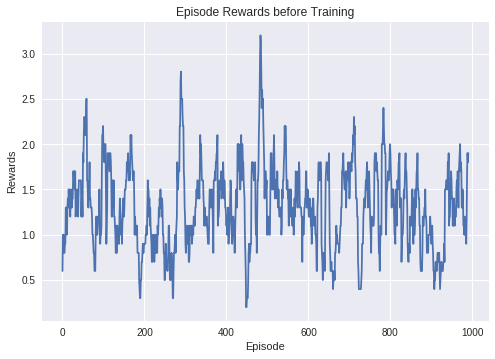

In [0]:
plt.figure()
episode_ma_pre = np.convolve(episode_rewards_pre, 
                         np.ones((10,))/10, mode='valid')
plt.plot(episode_ma_pre)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.title('Episode Rewards before Training')

## Define the callback function
This function is in reference to the training monitor example provided by the stable_baselines developers. https://colab.research.google.com/drive/1L_IMo6v0a0ALK8nefZm6PqPSy0vZIWBT#scrollTo=hyyN-2qyK_T2 

The callback function is defined to monitor the training process. It prints stats every 1000 timesteps. 

In [0]:
best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    """
    Callback called at each step
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 1000 == 0:
        # Evaluate policy performance
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-10:])
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
    n_steps += 1
    return False

In [0]:
# Create log dir to save monitor.csv file
log_dir = "/tmp/log/Breakout/"
os.makedirs(log_dir, exist_ok=True)

In [0]:
# Remake and wrap the environment
env = make_atari('BreakoutNoFrameskip-v4')
env = Monitor(env, log_dir, allow_early_resets=True)
# Train the model by Deep Q-networks algorithm
t0 = time.time()
model = DQN(CnnPolicy, env, verbose=0)
model.learn(total_timesteps=25000, callback=callback)
t = time.time()-t0
print('Time used for training:{}'.format(t))

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


878 timesteps
Best mean reward: -inf - Last mean reward per episode: 0.80
1856 timesteps
Best mean reward: 0.80 - Last mean reward per episode: 1.22
2817 timesteps
Best mean reward: 1.22 - Last mean reward per episode: 1.00
3963 timesteps
Best mean reward: 1.22 - Last mean reward per episode: 1.10
4618 timesteps
Best mean reward: 1.22 - Last mean reward per episode: 1.20
5840 timesteps
Best mean reward: 1.22 - Last mean reward per episode: 1.40
6851 timesteps
Best mean reward: 1.40 - Last mean reward per episode: 1.20
7861 timesteps
Best mean reward: 1.40 - Last mean reward per episode: 1.50
8633 timesteps
Best mean reward: 1.50 - Last mean reward per episode: 1.60
9822 timesteps
Best mean reward: 1.60 - Last mean reward per episode: 1.40
10646 timesteps
Best mean reward: 1.60 - Last mean reward per episode: 1.70
11926 timesteps
Best mean reward: 1.70 - Last mean reward per episode: 1.40
12887 timesteps
Best mean reward: 1.70 - Last mean reward per episode: 1.00
13614 timesteps
Best me

In [0]:
#model.save('deepq_breakout.h5')
#files.download('deepq_breakout.h5')

In [0]:
#model = DQN.load('deepq_breakout.h5')

## Define functions to plot results.
The movingAverage function to smooth values by a moving average method. The plot_results function plots the curve of timesteps versus smoothed total rewards.

In [0]:
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = movingAverage(y, window=5)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


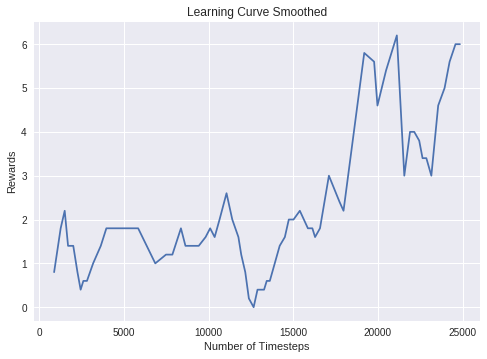

In [0]:
plot_results(log_dir)

## Test the trained model in 1000 episodes
Collect rewards for every episode

In [0]:
episode_rewards = []
for episode in range(1000):
    R = 0
    #print('episode :{}'.format(episode))
    obs = env.reset()
    for t in range(1000):
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        R += reward
        if done or t == 999:
            episode_rewards.append(R)
            if episode % 10 == 0:
              print('episode :{}'.format(episode))
              print("Rolling Episode Rewards: {}".format(np.mean(episode_rewards[-10:])))  
            break

episode :0
Rolling Episode Rewards: 2.0
episode :10
Rolling Episode Rewards: 5.2
episode :20
Rolling Episode Rewards: 4.4
episode :30
Rolling Episode Rewards: 4.8
episode :40
Rolling Episode Rewards: 5.4
episode :50
Rolling Episode Rewards: 4.2
episode :60
Rolling Episode Rewards: 3.6
episode :70
Rolling Episode Rewards: 5.0
episode :80
Rolling Episode Rewards: 3.8
episode :90
Rolling Episode Rewards: 4.2
episode :100
Rolling Episode Rewards: 4.8
episode :110
Rolling Episode Rewards: 3.8
episode :120
Rolling Episode Rewards: 6.0
episode :130
Rolling Episode Rewards: 4.8
episode :140
Rolling Episode Rewards: 3.2
episode :150
Rolling Episode Rewards: 4.6
episode :160
Rolling Episode Rewards: 5.8
episode :170
Rolling Episode Rewards: 4.6
episode :180
Rolling Episode Rewards: 4.4
episode :190
Rolling Episode Rewards: 4.0
episode :200
Rolling Episode Rewards: 4.2
episode :210
Rolling Episode Rewards: 4.2
episode :220
Rolling Episode Rewards: 5.2
episode :230
Rolling Episode Rewards: 6.0
epi

Plot smoothed episode rewards

Text(0.5,1,'Episode Rewards after Training')

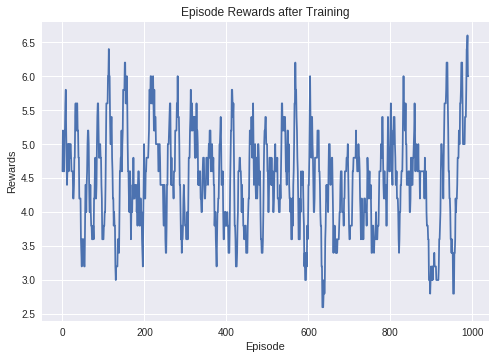

In [0]:
plt.figure()
episode_ma = np.convolve(episode_rewards, 
                         np.ones((10,))/10, mode='valid')
plt.plot(episode_ma)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.title('Episode Rewards after Training')